# UNDERSTANDING EXPERIMENTAL DATA

This chapter is about **understanding experimental data**. 

We will

* make extensive use of `plotting to visualize the data`, and 

* show how to use `linear regression` to build a model of experimental data.

## The Behavior of Projectiles

We decided to use one of our springs to build `a device capable of launching a projectile`. 

We used the device **four** times to fire a projectile at **a target** 1080 inches from the **launching point**. 

Each time, we measured `the height of the projectile` at various `distances from the launching point`.

* The `launching point` and the `target` were at `the same height`, which we treated as `0.0` in our measurements.

![projectile](./img/projectile.jpg)

The data was stored in a file **./data/launcherData.csv**

* The `first column` contains `distances of the projectile from the target`. 

* The `other columns` contain `the height of the projectile at that distance` for each of the four trials. 

All of the measurements are in **inches**.

In [ ]:
# %load ./data/launcherData.csv
Distance,Trial1,Trial2,Trial3,Trial4
1080,0.0,0.0,0.0,0.0
1044,2.25,3.25,4.5,6.5
1008,5.25,6.5,6.5,8.75
972,7.5,7.75,8.25,9.25
936,8.75,9.25,9.5,10.5
900,12.0,12.25,12.5,14.75
864,13.75,16.0,16.0,16.5
828,14.75,15.25,15.5,17.5
792,15.5,16.0,16.6,16.75
756,17.0,17.0,17.5,19.25
720,17.5,18.5,18.5,19.0
540,19.5,20.0,20.25,20.5
360,18.5,18.5,19.0,19.0
180,13.0,13.0,13.0,13.0
0,0.0,0.0,0.0,0.0

The following code was used to plot :

* the **mean altitude of the projectile(Y)** against the **distance from the point of launch(X)**.

* the best `linear` and `quadratic` fits to the points.

```python
d2h={'d':None,'h':[[],[],[],[]]}
```

In [173]:
import csv

def get_trajectory_data(file_name):
    csvfile = open(file_name, 'r')
    csvdata = csv.DictReader(csvfile)
    # fields
    fields = csvdata.fieldnames
    trials = len(fields)-1
    d2hs = {'d': [], 'h': [[] for i in range(trials)]}
    # values
    rows=0
    for row in csvdata:
        # the distance in first column
        d2hs['d'].append(float(row[fields[0]]))
        for i in range(trials):
            cur_height = float(row[fields[i+1]])
            d2hs['h'][i].append(cur_height)
        rows+=1    
    csvfile.close()
    return d2hs, trials,rows
 

In [176]:
file_name='./data/launcherData.csv'
d2hs,trials,rows = get_trajectory_data(file_name)
print(f"trials：{trials}, rows={rows}")
for key in d2hs.keys():
    print(key,end="\t")
print("")
for i in range(len(d2hs['d'])):
    print(d2hs['d'][i],end="\t")
    for j in range(len(d2hs['h'])):
        cur_column=d2hs['h'][j]
        print(cur_column[i],end="\t")
    print("")   
 

trials：4, rows=15
d	h	
1080.0	0.0	0.0	0.0	0.0	
1044.0	2.25	3.25	4.5	6.5	
1008.0	5.25	6.5	6.5	8.75	
972.0	7.5	7.75	8.25	9.25	
936.0	8.75	9.25	9.5	10.5	
900.0	12.0	12.25	12.5	14.75	
864.0	13.75	16.0	16.0	16.5	
828.0	14.75	15.25	15.5	17.5	
792.0	15.5	16.0	16.6	16.75	
756.0	17.0	17.0	17.5	19.25	
720.0	17.5	18.5	18.5	19.0	
540.0	19.5	20.0	20.25	20.5	
360.0	18.5	18.5	19.0	19.0	
180.0	13.0	13.0	13.0	13.0	
0.0	0.0	0.0	0.0	0.0	


### 1 Linear Regression to Find a Fit

Whenever we fit any curve (including a line) to data we need some way to decide `which curve is the best fit for the data`. 

This means that we need to define <b style="color:blue">an objective function</b> that provides `a quantitative assessment of how well the curve fits the data`. 

Once we have such `a function`, finding the best fit can be formulated as

* finding a curve that <b style="color:blue">minimizes (or maximizes)</b> the value of that function, i.e., as **an optimization problem** 

The most commonly used objective function is called <b style="color:blue">least squares(最小二乘)</b>,

The objective function is then defined as

$$\sum_{i=0}^{len(observed)-1}(observed[i]-predicted[i])^2$$



**Numpy.polyfit**

http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

`Numpy` provides a function, `polyfit`, that finds the best Least squares polynomial fit.
```python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
The algorithm used by `polyfit` is called <b style="color:blue">linear regression</b>.

Fit a polynomial of degree `deg` to points (x, y). 

$$p(x) = p[0] * x^{deg} + ... + p[deg]$$

Returns a vector of **coefficients**  <b style="color:blue">$p$</b> that minimises the squared error.



```python
numpy.polyfit(observedXVals, observedYVals, n)
numpy.polyfit(observedXVals, observedYVals, 1) # y = ax + b
numpy.polyfit(observedXVals, observedYVals, 2) # y = ax^2 + bx+c
```


In [230]:
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
fit = np.polyfit(x, y, 1)
fit

array([-0.30285714,  0.75714286])

In [231]:
fit = np.polyfit(x, y, 2)
fit

array([-0.16071429,  0.50071429,  0.22142857])

**numpy.polyval(p, x)**

Evaluate a polynomial at specific values.

This function takes two arguments:
* <b style="color:blue">$p$</b>: a sequence of polynomial coefficients  
* <b style="color:blue">$x$</b>: a sequence of values at which the polynomial is to be evaluated.
> https://numpy.org/doc/stable/reference/generated/numpy.polyval.html


In [225]:
v=np.array([1.1,2.3])
z= np.polyval(fit,v)
z

array([0.57775   , 0.52289286])

**Elementwise operations** on arrays 

linear fit : `a,b = np.polyfit(x,y, 1)`
  
quadratic fit: `a,b,c = np.polyfit(x, y, 2)`

```python
 y = a*x^2 + b*x+c
```
x,y : the array


In [226]:
a,b,c=np.polyfit(x, y, 2)
v=np.array([1.1,2.3])
z=a*(v**2)+b*v+c
z

array([0.57775   , 0.52289286])

### 2 Using numpy.polyfit to fit the experimental data




In [251]:
import numpy as np
import matplotlib.pyplot as plt

def get_mean_height(d2hs,trials,rows):
    distances = np.array(d2hs['d'])
    mean_heights = np.empty(rows)
    for i in range(rows):
        mean_heights[i] = d2hs['h'][0][i]
        for j in range(trials-1):
            mean_heights[i] += d2hs['h'][j+1][i]
            mean_heights[i] /= trials
    return distances,mean_heights 

def process_trajectories(distances,  mean_heights):
    plt.title(f'Trajectory of Projectile (Mean Height of {trials} Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Mean Height of the projectile')

    # the experimental data
    plt.plot(distances, mean_heights, 'ro')

    # Linear Fit
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes=np.polyval(fit,distances)

    plt.plot(distances, altitudes, 'g-*', label=f"Linear Fit")

    # Quadratic Fit
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes=np.polyval(fit,distances)
  
    plt.plot(distances, altitudes, 'b:x', label=f"Quadratic Fit")
    plt.legend()

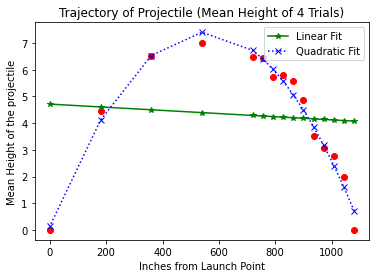

In [252]:
distances,mean_heights =get_mean_height(d2hs,trials,rows)
process_trajectories(distances,mean_heights)

A quick look at the plot on the right makes it quite clear that

* a **quadratic** fit is far better than a linear one

<b style="color:blue;font-size:120%">how bad a fit is the line and how good is the quadratic fit?</b>

* **Coefficient of Determination(决定系数)**

---
####  something about plotting lines with matplotlib.pyplot

* [Unit2-1-Matplotlib](./Unit2-1-Matplotlib.ipynb)

The function `process_trajectories` plot lines with a legend(图例说明)  

**line styles**

* the linear fit for the data.:  
```python
plt.plot(distances, altitudes, 'g-*', label = 'Linear Fit')
```

* the quadratic fit for the data.: 
```python
plt.plot(distances, altitudes, 'b:x', label = 'Quadratic Fit')
```

**Legend of matplotlib.pyplot**

* **label**：a legend of line      
       
* **Place a legend on the fig**

  *  `plt.legend(loc ='best')` 

     * Location String： **`'best'`**   

> reference: [matplotlib.pyplot.legend](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.legend.html): 

---

In [204]:
def r_squared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    # RSS: residual sum of squares
    estimate_error = ((predicted - measured)**2).sum()
    
    # the mean of the observed values.
    mean_measured = measured.mean()
    # TSS: total sum of squares
    variability = ((measured - mean_measured)**2).sum()
    
    return 1.0 - estimate_error/variability

In [249]:
import numpy as np
import matplotlib.pyplot as plt

def process_trajectories( distances , mean_heights):
    plt.title(f'Trajectory of Projectile (Mean Height of {trials} Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Mean Height of the projectile')

    # the experimental data
    plt.plot(distances, mean_heights, 'ro')

    # Linear Fit
    fit= np.polyfit(distances, mean_heights, 1)
    altitudes =np.polyval(fit,distances)

    r_line = r_squared(mean_heights, altitudes)
    plt.plot(distances, altitudes, 'g-*', label=f"Linear Fit, $R^2$= {r_line:.2f}")

    # Quadratic Fit
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes =np.polyval(fit,distances)

    r_quad = r_squared(mean_heights, altitudes)
    plt.plot(distances, altitudes, 'b:x',label=f"Quadratic Fit, $R^2$= {r_quad:.2f}")
    plt.legend()
 

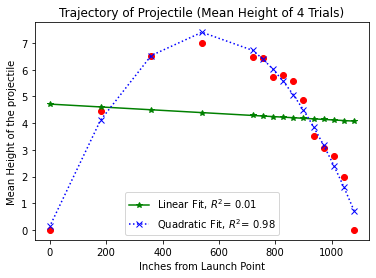

In [250]:
process_trajectories(distances , mean_heights)

This tells us that 

* 1 less than 2% of the variation in the measured data can be explained by the linear model,

* 2 more than **98%** of the  variation can be explained by the quadratic model

#### Matplotlib.pyplot: Formatting text: LaTeX
```python
   plt.plot(distances, altitudes, 'g-*',label=f"Linear Fit, $R^2$= {r_line:.2f}")
```
Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.).

* For example, `$R^2$`. $R^2$